In [1]:
"""
Martin Infante, mbi244
Project02 COE379L

"""


# Part 1 : (5 points) Exploratory Data Analysis

import pandas as pd
import numpy as np

data = pd.read_csv('california_housing.csv')
data


/tmp/ipykernel_7584/4051016884.py:10: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0
...,...,...,...,...,...,...,...,...,...
20629,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,1
20630,5.6790,20.0,6.401274,1.070064,457.0,2.910828,38.56,-122.05,1
20631,1.9327,10.0,5.789474,1.078947,898.0,3.938596,38.57,-121.92,1
20632,3.7500,38.0,5.275229,0.981651,259.0,2.376147,38.72,-121.90,1


In [2]:
# Identify shape and size of the data (1 point)
data.shape

(20634, 9)

In [3]:
data.size

185706

In [4]:
# Get information about datatypes. Comment if any of the variables need datatype conversion. 
# Check for duplicate rows and treat them if required. (1 point)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [5]:
"""
None of the variables need datatype conversions. Variables are natively float64 types, so it will be easier to conduct visualizations. 
price_above_median is a class variable, so it could be changed to a bool type for clarity. But I will keep it as is for now.
"""
data["price_above_median"].unique()

array([0, 1])

In [6]:
data.duplicated().sum()

0

In [7]:
"""
No duplicate rows and no null entries. 
The data is also float type so don't need to impute for improper values like '?' or '#' like I did in Project 01
"""
data.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

In [8]:
# Get the statistical information (mean, median, etc.) for all variables and derive meaniful insights from it. 
# Comment if you see any anamolies in the data. (1 point)
"""
Max values of AveRooms and AveOccup differ largely from the mean
    max_AveRooms = 141.91, mean_AveRooms = 5.43
    max_AveOccup = 1243.33, mean_AveOccup = 3.07

As these values represent data within a block population for HOUSES, it could indicative of closely populated neighborhood or misinputted data
"""
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000
mean,3.870795,28.640399,5.429171,1.096628,1425.398081,3.070449,35.631722,-119.569594,0.500000
std,1.899796,12.584629,2.474393,0.473929,1132.137403,10.387501,2.135738,2.003457,0.500012
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000000
25%,2.563925,18.000000,4.440930,1.006067,787.000000,2.429649,33.930000,-121.800000,0.000000
50%,3.534950,29.000000,5.229190,1.048780,1166.000000,2.817937,34.260000,-118.490000,0.500000
75%,4.743550,37.000000,6.052381,1.099499,1725.000000,3.282249,37.710000,-118.010000,1.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,1.000000


In [9]:
data.median()

MedInc                   3.534950
HouseAge                29.000000
AveRooms                 5.229190
AveBedrms                1.048780
Population            1166.000000
AveOccup                 2.817937
Latitude                34.260000
Longitude             -118.490000
price_above_median       0.500000
dtype: float64

In [10]:
data.mode()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,3.1250,52.0,5.0,1.0,891.0,3.0,34.06,-118.31,0
1,15.0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [11]:
"""
data.mode() outputted two rows instead of one. This anomaly indicates that MedInc and price_above_median 
columns have two values that show up equally most frequent
"""
(data['MedInc'] == 3.1250).sum()

49

In [12]:
(data['MedInc'] == 15.0001).sum()

49

In [13]:
(data['price_above_median'] == 0).sum()

10317

In [14]:
(data['price_above_median'] == 1).sum()

10317

<Axes: xlabel='MedInc', ylabel='Count'>

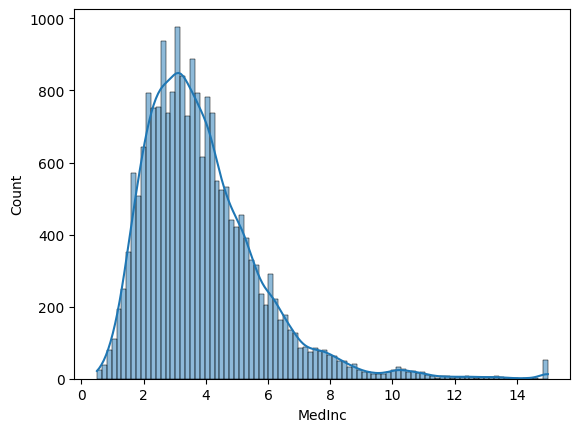

In [15]:
# Visualize the dataset through different univariate analysis and comment on your observations. (2)
import seaborn as sns
import matplotlib.pyplot as plt

"""
Univariate Analysis Plan
- Use histplot for variables that are more uniformly distributed
- Use boxplot for data with outliers that deviate significantly from mean
- Use kde plot to showcase narrow peaks
"""

sns.histplot(data=data['MedInc'], kde=True)

<Axes: xlabel='HouseAge', ylabel='Count'>

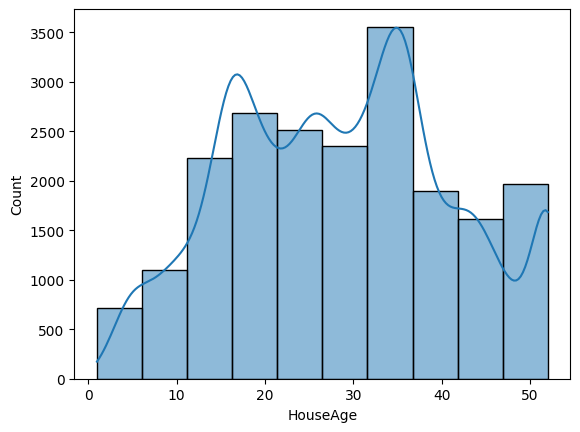

In [16]:
sns.histplot(data=data['HouseAge'], bins=10, kde=True)

<Axes: xlabel='AveRooms', ylabel='Density'>

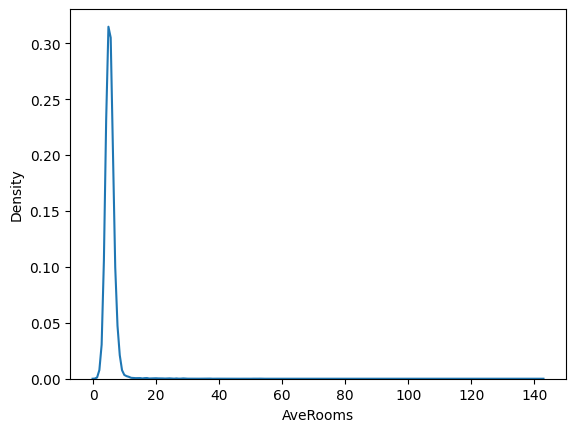

In [17]:
# sns.boxplot(data=data, x='AveRooms')
sns.kdeplot(data=data['AveRooms'],)

<Axes: xlabel='AveBedrms', ylabel='Density'>

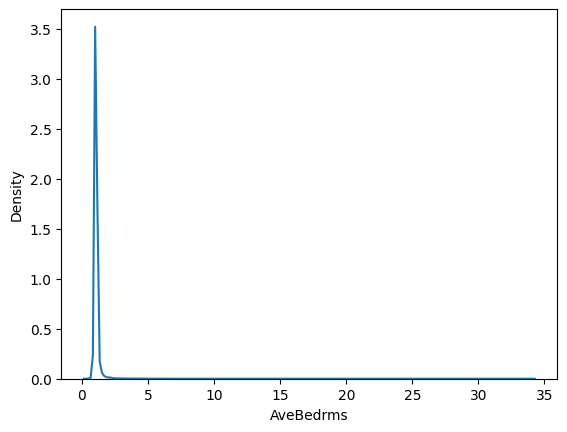

In [18]:
sns.kdeplot(data=data['AveBedrms'],)

<Axes: ylabel='Population'>

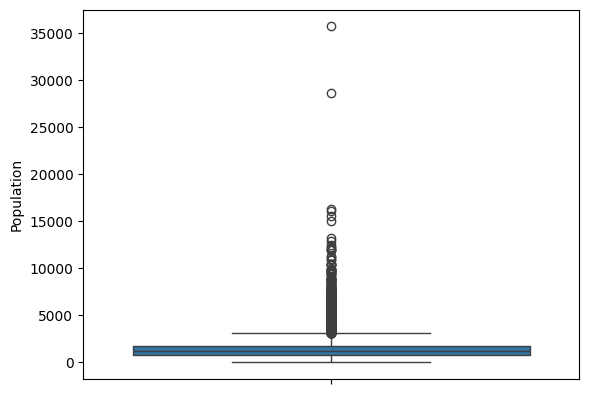

In [19]:
sns.boxplot(data=data['Population'])

<Axes: xlabel='AveOccup', ylabel='Density'>

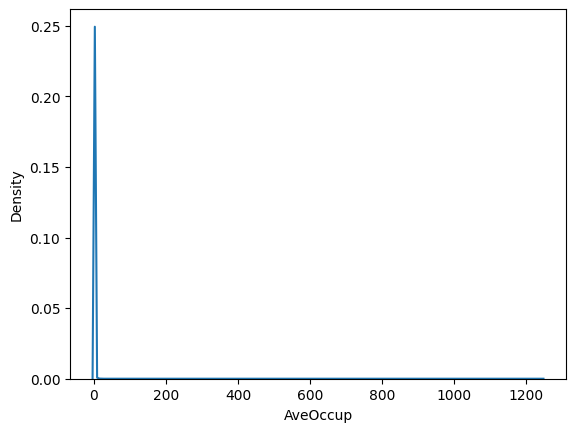

In [20]:
sns.kdeplot(data=data['AveOccup'])

<Axes: xlabel='Latitude', ylabel='Count'>

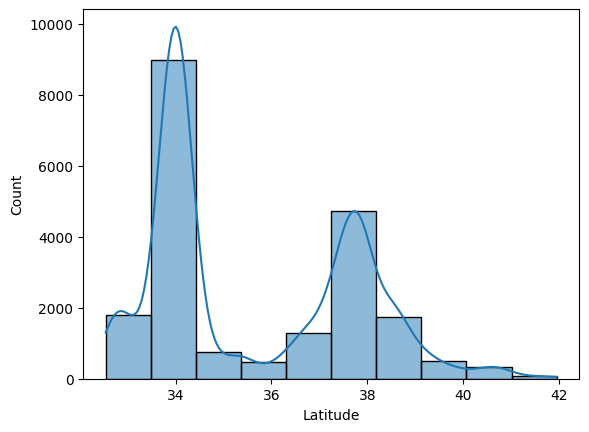

In [21]:
sns.histplot(data=data['Latitude'], bins=10, kde=True)

<Axes: xlabel='Longitude', ylabel='Count'>

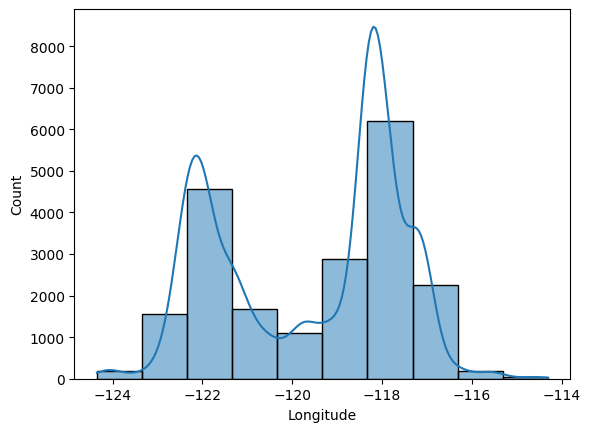

In [22]:
sns.histplot(data=data['Longitude'], bins=10, kde=True)

<Axes: xlabel='price_above_median', ylabel='Count'>

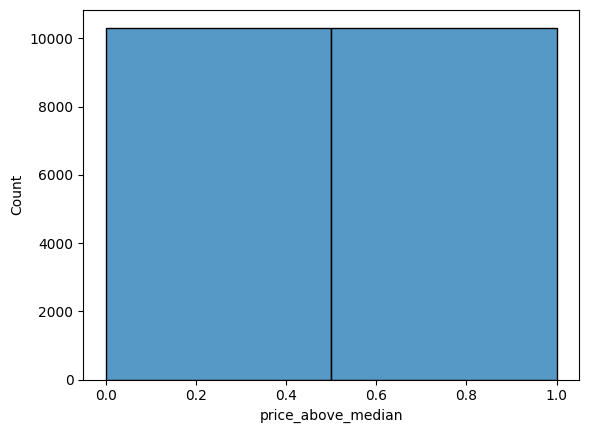

In [23]:
sns.histplot(data=data['price_above_median'], bins = 2)

In [24]:
# Part 2 : (10 points) Classification techniques

# Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 points)

from sklearn.model_selection import train_test_split
x = data.drop('price_above_median',axis=1) # remove class column
y = data['price_above_median']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=1)


In [25]:
# Perform classification using below supervised learning techniques. 
# When appropriate, use a hyperparameter space search to find optimal hyperparameter setting. 
# Consider using other techniques from class lectures, such as data standardization. At a minimum, you should try the following model algorithms. 
# We will base the grading on the quality of your model(s) you develop. (5 points)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report

""" 
Will use RobustScaler becasue 4/8 of independent variables contain outliers that deviate significantly from the mean
"""

' \nWill use RobustScaler becasue 4/8 of independent variables contain outliers that deviate significantly from the mean\n'

In [26]:
# K-nearnest neighbor
knn = Pipeline([
    ('scale', RobustScaler()),
    ('knn', KNeighborsClassifier())
])

knn_param_grid = {
    "knn__n_neighbors": np.arange(1, 20)
}

knn_gscv = GridSearchCV(knn, knn_param_grid, cv=5)
knn_gscv.fit(x_train, y_train)
knn_gscv.best_params_

{'knn__n_neighbors': 11}

In [27]:
# Decision Tree Classifier
dt = Pipeline([
    ('scale', RobustScaler()),
    ('dt', DecisionTreeClassifier())
])

dt_param_grid = {
    "dt__max_depth": np.arange(start=2, stop =20)
}

dt_gscv = GridSearchCV(dt, dt_param_grid, cv=5)
dt_gscv.fit(x_train, y_train)
dt_gscv.best_params_

{'dt__max_depth': 11}

In [28]:
# Random Forest Classifier
rf = Pipeline([
    ('scale', RobustScaler()),
    ('rf', RandomForestClassifier())
])

rf_param_grid = {
    "rf__n_estimators": np.arange(start=10, stop=30, step=2),
    "rf__max_depth": np.arange(start=2, stop=20),
    "rf__min_samples_leaf": np.arange(start=1, stop=5),
}

rf_gscv = GridSearchCV(rf, rf_param_grid, cv=5)
rf_gscv.fit(x_train, y_train)
rf_gscv.best_params_

{'rf__max_depth': 19, 'rf__min_samples_leaf': 3, 'rf__n_estimators': 26}

In [30]:
# AdaBoost Classifier
ada = Pipeline([
    ('scale', RobustScaler()),
    ('ada', AdaBoostClassifier())
])

ada_param_grid = {
    "ada__n_estimators": [25, 50, 75], # number of weak learners to train
    "ada__learning_rate":  [0.1, 0.5, 1.0]
}

ada_gscv = GridSearchCV(ada, ada_param_grid, cv=5)
ada_gscv.fit(x_train, y_train)
ada_gscv.best_params_

{'ada__learning_rate': 1.0, 'ada__n_estimators': 75}

In [32]:
# Print report showing accuracy, recall, precision and f1-score for each classification model on all data (training, testing, etc.). 
# Which metric is most important for this problem? (You will explain your answer in the report in Part 3). (2 points)

""""
Most important metric depends. 
Better recall score = less FN
    -> So reduce chance of undervaluing a house
    -> If you pay less than what it is worth, you benefit the buyer, but since we are decreasing that likelihood, we benefit the SELLER
Better precision score = less FP
    -> So reduce chance of overvaluing a house
    -? If you pay more than what is is worth, you benfefit the seller, but since we are decreasing that likelihood, we benefit the BUYER

Because of this dependency, the most important overall metric is accuracy.

"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = [knn_gscv, dt_gscv, rf_gscv, ada_gscv]
for m in models:
    print(m)
    # print accuracy
    accuracy_test=accuracy_score(y_test, m.predict(x_test))
    print('Accuracy on test data is : {:.2}'.format(accuracy_test))
    accuracy_train=accuracy_score(y_train, m.predict(x_train))
    print('Accuracy on train data is : {:.2}'.format(accuracy_train))
    
    # print precision
    precision_test = precision_score(y_test, m.predict(x_test))
    print('Precision on test data is : {:.2}'.format(precision_test))
    precision_train = precision_score(y_train, m.predict(x_train))
    print('Precision on train data is : {:.2}'.format(precision_train))
    
    # print recall
    recall_test = recall_score(y_test, m.predict(x_test))
    print('Recall on test data is : {:.2}'.format(recall_test))
    recall_train = recall_score(y_train, m.predict(x_train))
    print('Recall on train data is : {:.2}'.format(recall_train))
    
    
    # print f1-score
    f1_test = f1_score(y_test, m.predict(x_test))
    print('F1-score on test data is : {:.2}'.format(f1_test))
    f1_train = f1_score(y_train, m.predict(x_train))
    print('F1-score on train data is : {:.2}'.format(f1_train))
    print()

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})
Accuracy on test data is : 0.83
Accuracy on train data is : 0.86
Precision on test data is : 0.83
Precision on train data is : 0.87
Recall on test data is : 0.83
Recall on train data is : 0.85
F1-score on test data is : 0.83
F1-score on train data is : 0.86

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})
Accuracy on test data is : 0.85
Accuracy on train data is : 0.93
Precision on test data is : 0.84
Precision on train data is : 0.94
Recall on test data i

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})


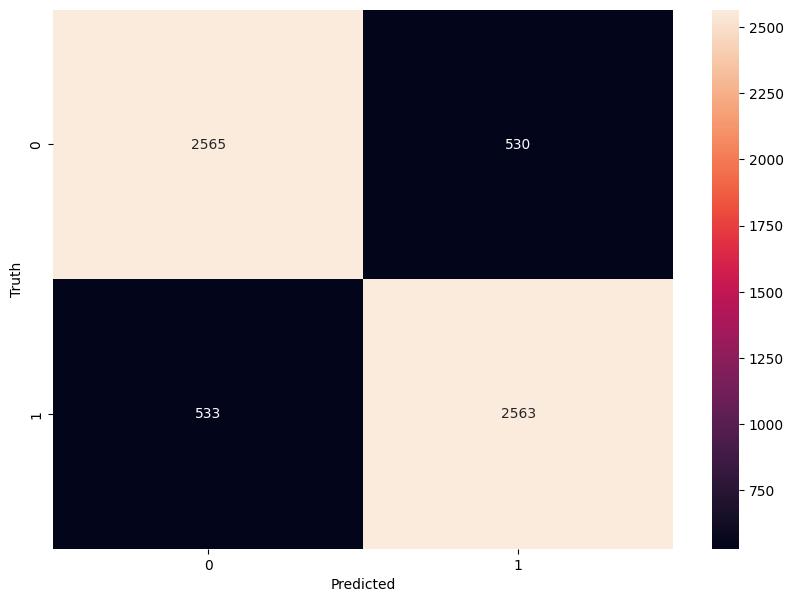

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})


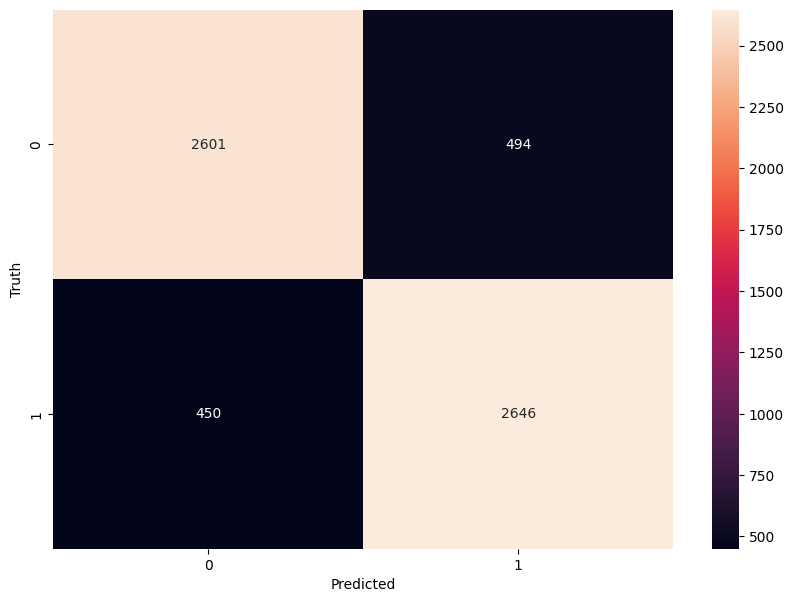

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'rf__min_samples_leaf': array([1, 2, 3, 4]),
                         'rf__n_estimators': array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28])})


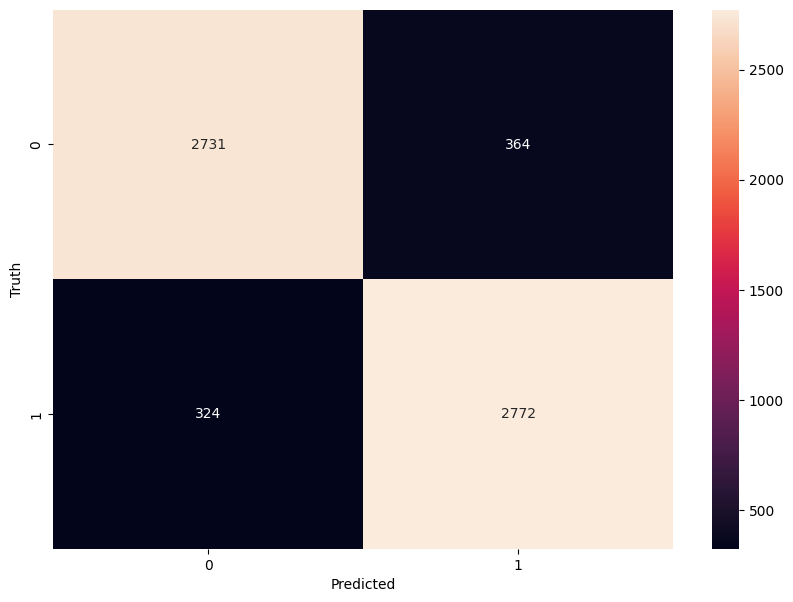

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', RobustScaler()),
                                       ('ada', AdaBoostClassifier())]),
             param_grid={'ada__learning_rate': [0.1, 0.5, 1.0],
                         'ada__n_estimators': [25, 50, 75]})


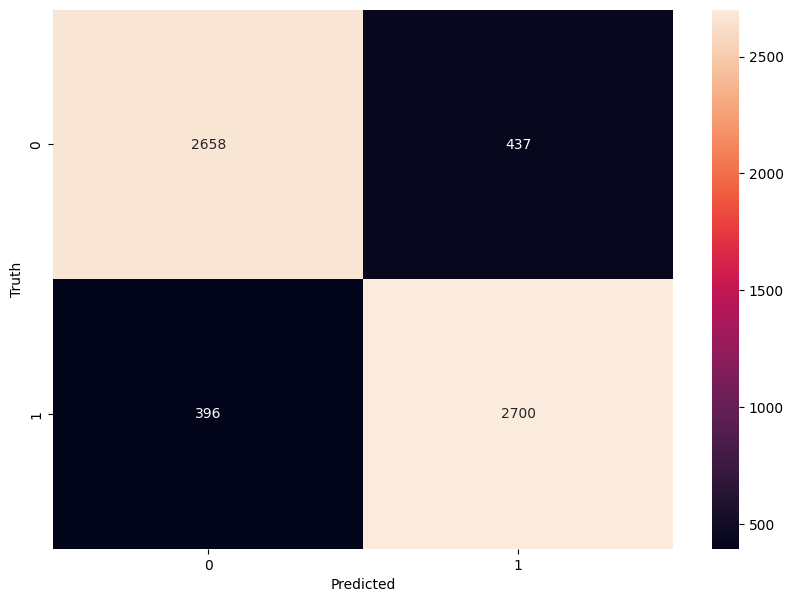

In [36]:
# Print confusion matrix for each model. (2 points)
from sklearn.metrics import confusion_matrix

for m in models:
    print(m)
    y_pred = m.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm,annot=True,fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    